<a href="https://colab.research.google.com/github/ycozco/ia_unsa_dataset_2022a/blob/main/price_car_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Collection and process

In [ ]:
#Cargar datos del archivo csv a pandas dataframe
car_dataset = pd.read_csv('/content/drive/MyDrive/ia_dataset/data_cars.csv')

In [ ]:
# Inspeccion de los 5 primeras filas
car_dataset.head()

,door_num,fuel_type,hp,location,mileage,price,ref_num,seller,title,transmission,year
0,5,gasolina,60,Málaga,170000,1450,426875509,Profesional,Renault - Clio,manual,2000
1,5,híbrido,108,Madrid,14950,23390,429436719,Profesional,RENAULT - Zoe Intens 80 kW R110 Bateria 50kWh,automático,2020
2,5,diesel,165,Cuenca,260000,8990,426571125,Profesional,OPEL - Zafira Tourer 2.0 CDTi 165 CV Selective,manual,2012
3,5,diesel,313,Alicante,235000,21900,418805767,Particular,Bmw - Serie 7,automático,2013
4,5,gasolina,68,Jaén,74000,1800,428978271,Particular,Peugeot - 107,manual,2007


In [ ]:
#Revisamos el numero de filas , columnas
car_dataset.shape

(6489, 11)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489 entries, 0 to 6488
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   door_num      6489 non-null   int64 
 1   fuel_type     6489 non-null   object
 2   hp            6489 non-null   int64 
 3   location      6489 non-null   object
 4   mileage       6489 non-null   int64 
 5   price         6489 non-null   int64 
 6   ref_num       6489 non-null   int64 
 7   seller        6489 non-null   object
 8   title         6486 non-null   object
 9   transmission  6489 non-null   object
 10  year          6489 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 557.8+ KB


In [ ]:
# Revisando la cantidad de datos faltantes
car_dataset.isnull().sum()

door_num        0
fuel_type       0
hp              0
location        0
mileage         0
price           0
ref_num         0
seller          0
title           3
transmission    0
year            0
dtype: int64

title missing = 4

In [ ]:
#Revisando la distribucion por categoria de nuestros datos
print(car_dataset.fuel_type.value_counts())
print(car_dataset.seller.value_counts())
print(car_dataset.transmission.value_counts())


diesel       3701
gasolina     2483
híbrido       225
Otro           65
eléctrico       9
GLP             6
Name: fuel_type, dtype: int64
Profesional    5266
Particular     1223
Name: seller, dtype: int64
manual        4386
automático    2103
Name: transmission, dtype: int64


Encoding categorical data

In [ ]:
# codificando "fuel_type" column
car_dataset.replace({'fuel_type':{'':0, 'diesel':1, 'eléctrico':2,'gasolina':3,'GLP':4,'híbrido':5,'Otro':6}},inplace=True)
# codificando "seller" column
car_dataset.replace({'seller':{'Profesional':0,'Particular':1}},inplace=True)
# codificando "transsmision" column
car_dataset.replace({'transmission':{'manual':0,'automático':1}},inplace=True)
# codificando "location" column
car_dataset.replace({'location':{'Álava':0,'Albacete':1,'Alicante':2,'Almería':3,'Asturias':4,'Ávila':5,'Badajoz':6,'Baleares':7,'Barcelona':8,
                                 'Burgos':9,'Cáceres':10,'Cádiz':11,'Cantabria':12,'Castellón':13,'Ciudad Real':14,'Córdoba':15,'Cuenca':16,
                                 'Girona':17,'Granada':18,'Guadalajara':19,'Guipúzcoa':20,'Huelva':21,'Huesca':22,'Jaén':23,'La Coruña':24,
                                 'La Rioja':25,'Las Palmas':26,'León':27,'Lleida':28,'Lugo':29,'Madrid':30,'Málaga':31,'Melilla':32,'Murcia':33,
                                 'Navarra':34,'Ourense':35,'Palencia':36,'Pontevedra':37,'Salamanca':38,'Segovia':39,'Sevilla':40,'Soria':41,
                                 'Tarragona':42,'Tenerife':42,'Teruel':43,'Toledo':44,'Valencia':45,'Valladolid':46,'Vizcaya':47,'Zamora':48,'Zaragoza':49,'':50}},inplace=True)


Verificacion despues de la codificacion

In [ ]:
car_dataset.head()

,door_num,fuel_type,hp,location,mileage,price,ref_num,seller,title,transmission,year
0,5,3,60,31,170000,1450,426875509,0,Renault - Clio,0,2000
1,5,5,108,30,14950,23390,429436719,0,RENAULT - Zoe Intens 80 kW R110 Bateria 50kWh,1,2020
2,5,1,165,16,260000,8990,426571125,0,OPEL - Zafira Tourer 2.0 CDTi 165 CV Selective,0,2012
3,5,1,313,2,235000,21900,418805767,1,Bmw - Serie 7,1,2013
4,5,3,68,23,74000,1800,428978271,1,Peugeot - 107,0,2007


Splitting the data and target

In [ ]:
X = car_dataset.drop(['title','price','location','ref_num'],axis=1)
Y = car_dataset['price']

In [ ]:
print(X)

      door_num  fuel_type   hp  mileage  seller  transmission  year
0            5          3   60   170000       0             0  2000
1            5          5  108    14950       0             1  2020
2            5          1  165   260000       0             0  2012
3            5          1  313   235000       1             1  2013
4            5          3   68    74000       1             0  2007
...        ...        ...  ...      ...     ...           ...   ...
6484         5          1  165   141608       0             1  2016
6485         3          1   90   110000       0             0  2011
6486         5          1  115    72997       0             0  2018
6487         5          1  190   136000       0             1  2007
6488         5          1  150    51338       0             0  2017

[6489 rows x 7 columns]


In [ ]:
print(Y)

0        1450
1       23390
2        8990
3       21900
4        1800
        ...  
6484     9350
6485     5999
6486    19390
6487    13250
6488    24500
Name: price, Length: 6489, dtype: int64


splitting training an  test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

Model Training

1. Linear Regresion


In [ ]:
# Loading the linnear regression model
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

Model Evaluation

In [ ]:
# predict on training data 
training_data_prediction =  lin_reg_model.predict(X_train)

In [ ]:
#  R square error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R score error:",error_score)

R score error: 0.2372542581549829


Visualize actual prices vs predicted prices

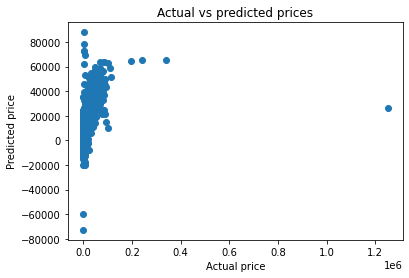

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs predicted prices')
plt.show()

Valores predichos por nuestra 'Machine Learning' son cercanos, asumimos que estos datos son consistentes y esta muy cerca del precio de venta original. 

In [ ]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
#  R square error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R score error:",error_score)

R score error: 0.31320393613194475


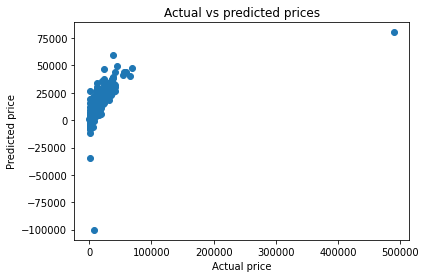

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs predicted prices')
plt.show()

2. Lasso Regression

In [ ]:
# Loading the Lasso  model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)


Lasso()

Model Evaluation

In [ ]:
# predict on training data 
training_data_prediction =  lass_reg_model.predict(X_train)

In [ ]:
#  R square error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R score error:",error_score)

R score error: 0.23725421982942563


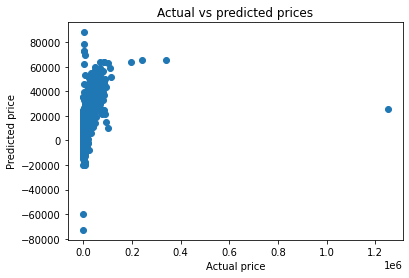

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs predicted prices')
plt.show()

In [ ]:
# prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
#  R square error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R score error:",error_score)

R score error: 0.3132182033298697


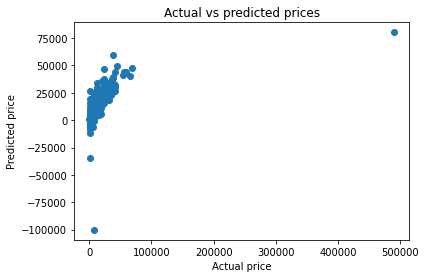

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs predicted prices')
plt.show()